In [ ]:
# name : Adharsh jaison
# roll_no: 23122103

In [ ]:
#credit: chat-GPT,https://www.geeksforgeeks.org/random-forest-regression-in-python/ 

In [ ]:
# dataset description
# The data consists of 52,416 observations of energy consumption on a 10-minute window. Every observation is described by 9 feature columns.

# Date Time: Time window of ten minutes.
# Temperature: Weather Temperature.
# Humidity: Weather Humidity.
# Wind Speed: Wind Speed.
# General Diffuse Flows: “Diffuse flow” is a catchall term to describe low-temperature (< 0.2° to ~ 100°C) fluids that slowly discharge through sulfide mounds, fractured lava flows, and assemblages of bacterial mats and macrofauna.
# Diffuse Flows
# Zone 1 Power Consumption
# Zone 2 Power Consumption
# Zone 3 Power Consumption

In [277]:
import pandas as pd

data=pd.read_csv("powerconsumption.csv")
df= pd.DataFrame(data)
df

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [278]:
df.columns

Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object')

In [279]:
df.isnull().sum()

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [280]:
df=df.drop(columns=['Datetime'])

In [281]:
df.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3'],
      dtype='object')

In [282]:
df = df.dropna()

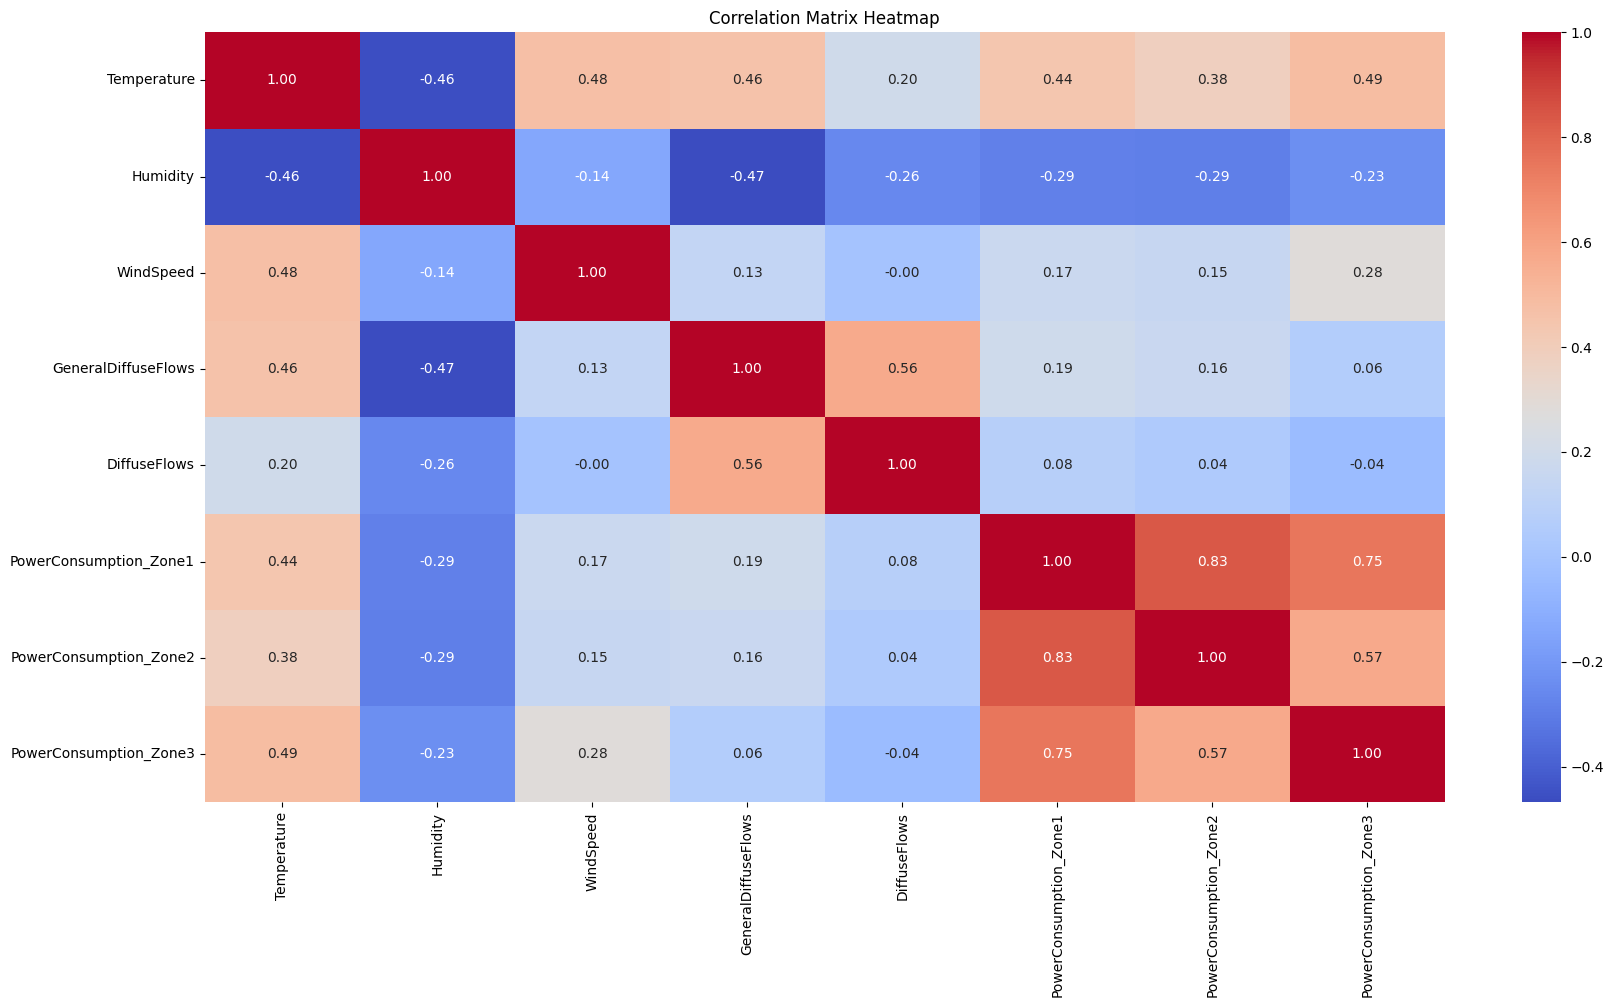

In [283]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
# print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


Mean Squared Error (MSE): 11476303.152629685
Root Mean Squared Error (RMSE): 3387.669280291346
Mean Absolute Error (MAE): 2374.932832801252
R-squared (R^2) Score: 0.5747884502416358


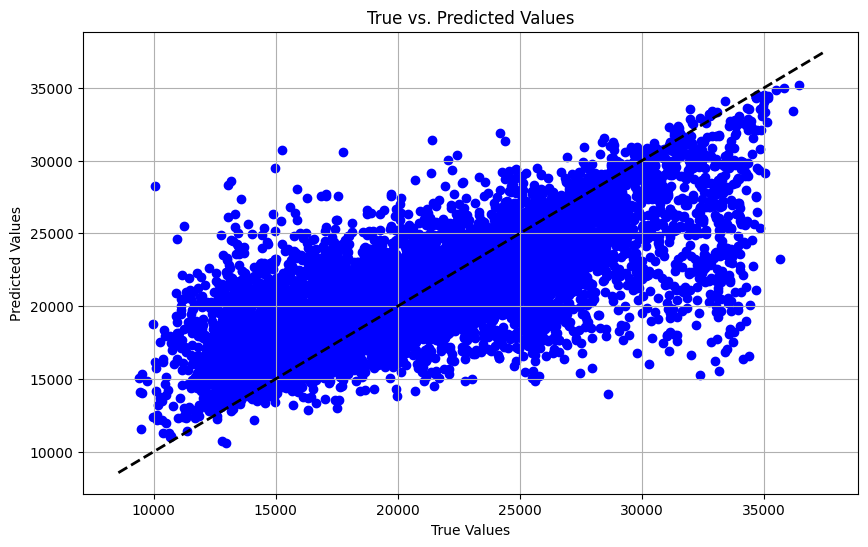

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score

X = df.drop(columns=['PowerConsumption_Zone1', 'PowerConsumption_Zone2','PowerConsumption_Zone3'])
y = df['PowerConsumption_Zone2']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R^2) score
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", r2)

# Plot the true values vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Plot the diagonal
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.grid(True)
plt.show()


Out-of-Bag Score: 0.09615587019534289
Mean Squared Error: 19471305.36710263
R-squared: 0.2785635042180885


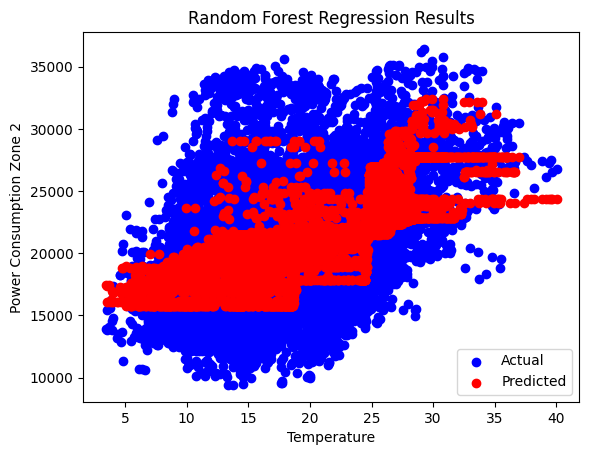

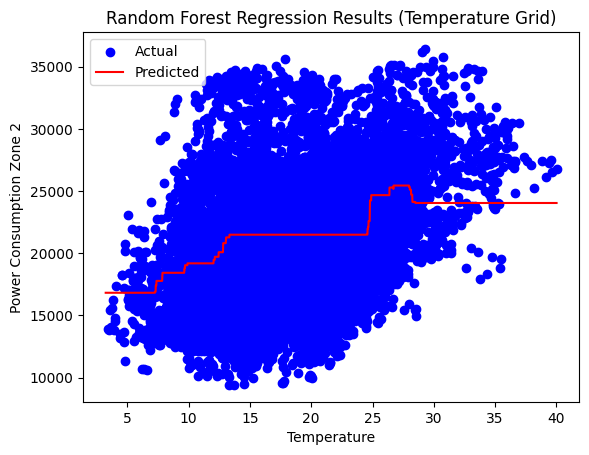

In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
import numpy as np

warnings.filterwarnings('ignore')


# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
regressor = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=0, oob_score=True)
regressor.fit(X_train_scaled, y_train)

# Evaluating the model
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the test set
predictions = regressor.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

# Plotting the results for Temperature
plt.scatter(X_test['Temperature'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Temperature'], predictions, color='red', label='Predicted')
plt.title("Random Forest Regression Results")
plt.xlabel('Temperature')
plt.ylabel('Power Consumption Zone 2')
plt.legend()
plt.show()

# Plotting X_grid for Temperature
# Note: This is meaningful only if Temperature is the most important feature

# Create a grid of values for Temperature
X_grid = np.arange(min(X['Temperature']), max(X['Temperature']), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

# Since we need to scale X_grid, we create a DataFrame to maintain the same structure
X_grid_df = pd.DataFrame(X_grid, columns=['Temperature'])

# Add the mean values for the other features to X_grid_df
for feature in X.columns:
    if feature != 'Temperature':
        X_grid_df[feature] = X[feature].mean()

# Scale X_grid_df using the same scaler
X_grid_scaled = scaler.transform(X_grid_df)

# Plot predictions for the grid values
plt.scatter(X_test['Temperature'], y_test, color='blue', label='Actual')
plt.plot(X_grid, regressor.predict(X_grid_scaled), color='red', label='Predicted')
plt.title("Random Forest Regression Results (Temperature Grid)")
plt.xlabel('Temperature')
plt.ylabel('Power Consumption Zone 2')
plt.legend()
plt.show()




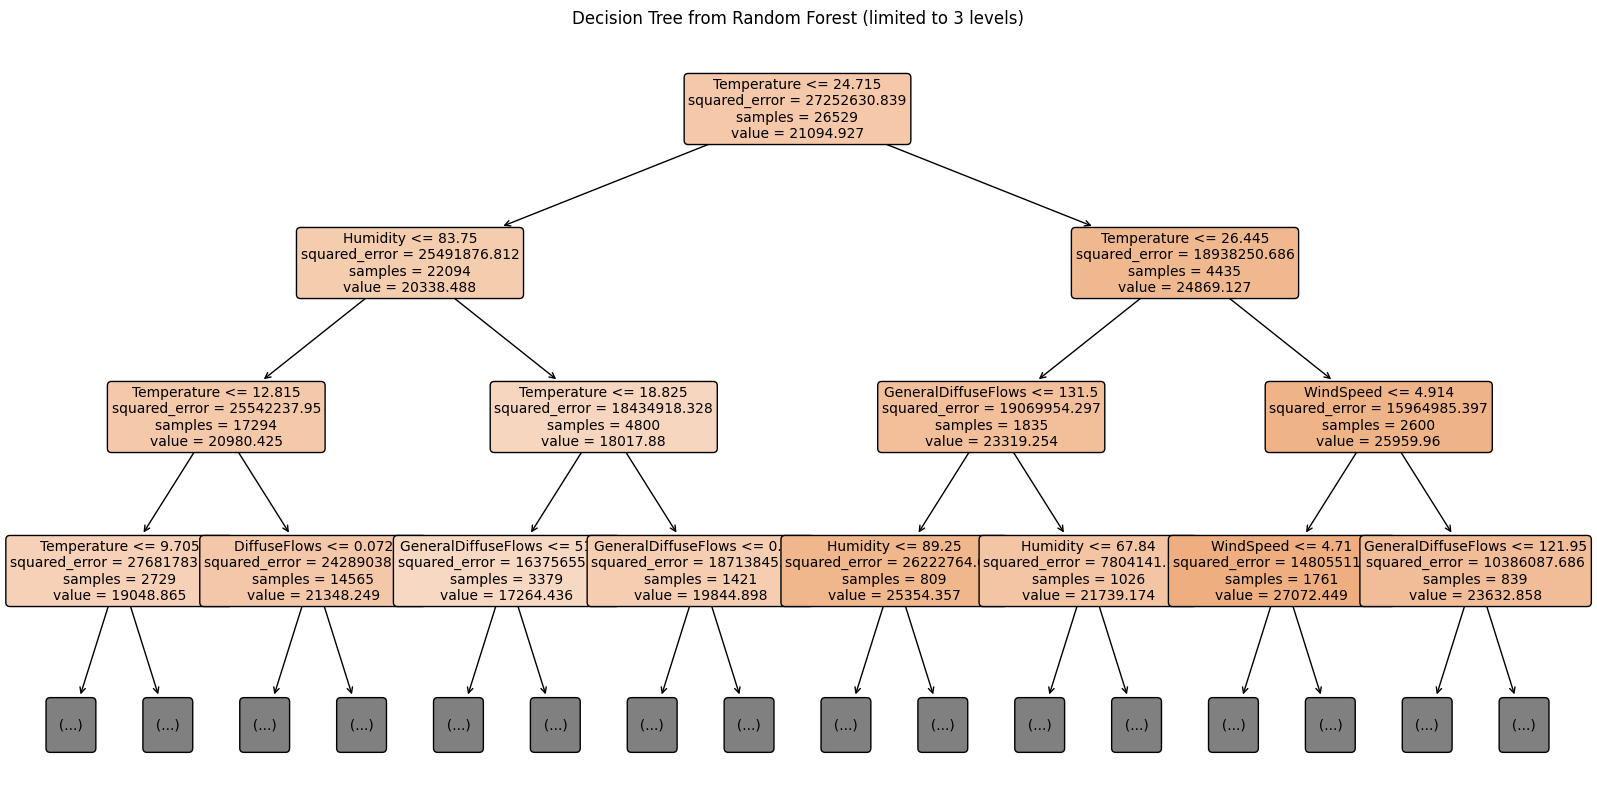

In [286]:
from sklearn.tree import plot_tree
tree_to_plot = rf_regressor.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns, filled=True, rounded=True, fontsize=10, max_depth=3)
plt.title("Decision Tree from Random Forest (limited to 3 levels)")
plt.show()